In [2]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

In [3]:
mp_pose = mp.solutions.pose
pose_image = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

In [4]:
def detectPose(image_pose, pose=pose_image, mp_drawing=mp_drawing):
    
    original_image = image_pose.copy()
    image_in_RGB = cv2.cvtColor(image_pose, cv2.COLOR_BGR2RGB)
    results = pose.process(image_in_RGB)

    if results.pose_landmarks:    

        mp_drawing.draw_landmarks(image=original_image, landmark_list=results.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS,
                                  landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255,255,255),
                                                                               thickness=3, circle_radius=3),
                                  connection_drawing_spec=mp_drawing.DrawingSpec(color=(49,125,237),
                                                                               thickness=2, circle_radius=2))

        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image_pose[:,:,::-1]);plt.title("Input Image")
        plt.axis('off')
        plt.subplot(122);plt.imshow(original_image[:,:,::-1]);plt.title("Pose detected Image")
        plt.axis('off')

In [5]:
import os
from dotenv import load_dotenv

load_dotenv()
dirname = os.path.dirname(os.getenv('PATH_TO_DATABASE'))

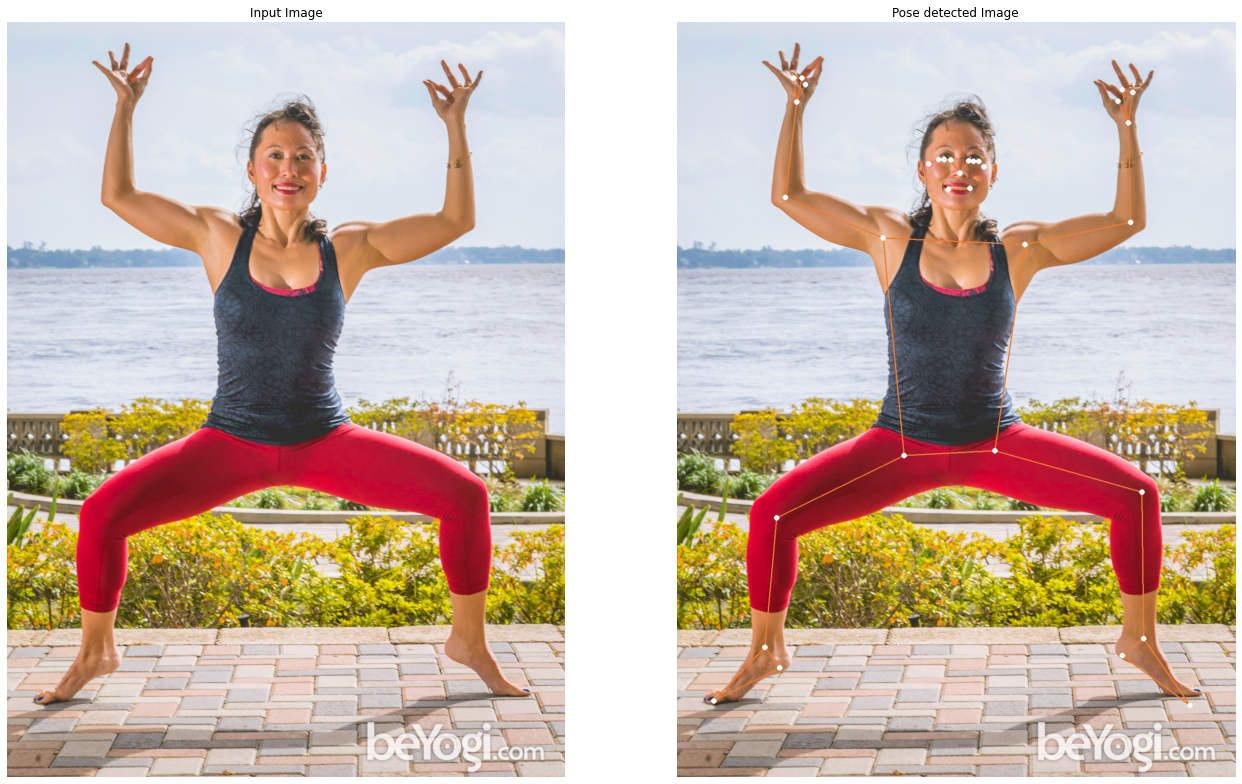

In [6]:
image_path = os.path.join(dirname, r'goddess/00000006.png')
output = cv2.imread(image_path)
detectPose(output, pose_image)


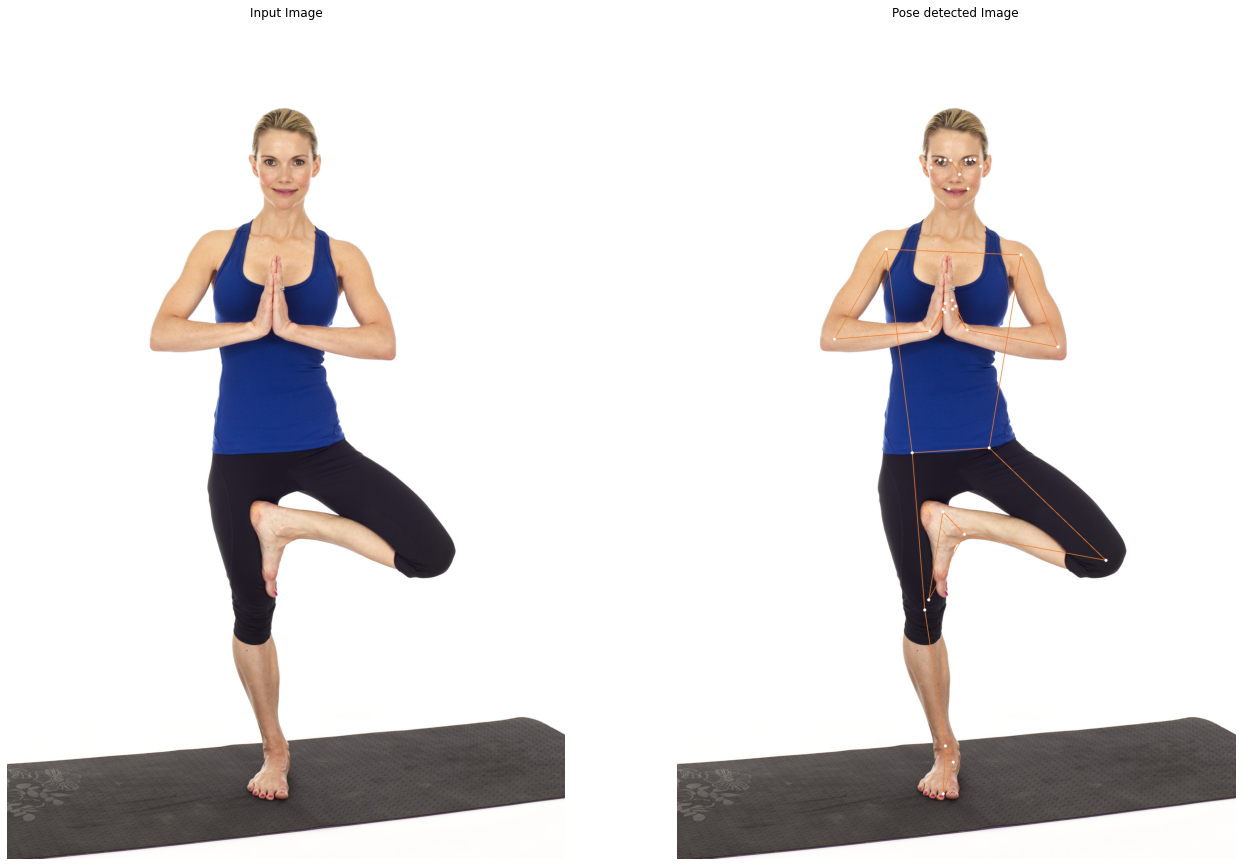

In [7]:
image_path = os.path.join(dirname, r'tree/00000006.jpg')
output = cv2.imread(image_path)
detectPose(output, pose_image)

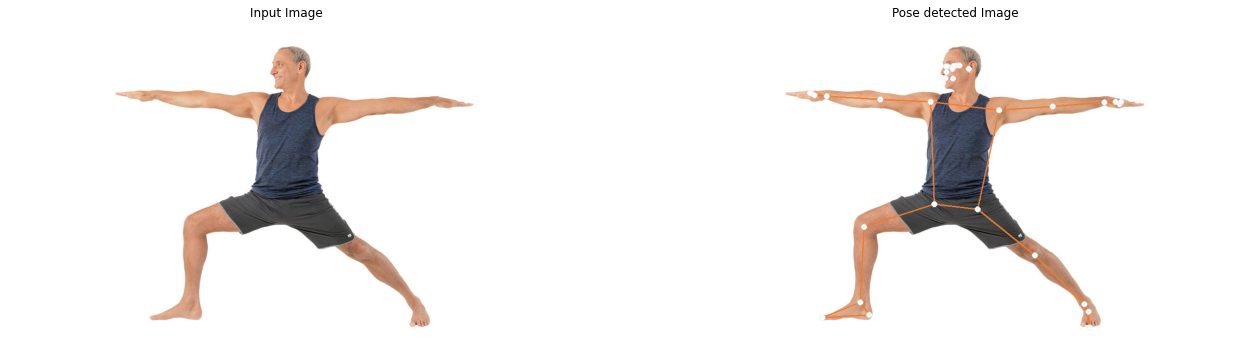

In [8]:
image_path = os.path.join(dirname, r'warrior2/00000001.jpg')
output = cv2.imread(image_path)
detectPose(output, pose_image)